*Import Libraries*

In [34]:
import numpy as np
# import tensorflow as tf                                                       # print(tf.__version__)
from tensorflow import keras
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt

*Step 1. Load data*<br/>
Path data: C:\Users\name pc\.keras<br/>
[MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist)<br>
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [38]:
name = 2                                                                        # 1:mnist; 2:fashion_mnist
if name==1:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()                    # 70,000 28x28
else:
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()            # 70,000 28x28
print(f"x_train.shape:{x_train.shape}")                                         # (60000, 28, 28) = (Number of images, 28 , 28)
print(f"x_test.shape:{x_test.shape}")                                           # (10000, 28, 28) = (Number of images, 28 , 28)
print(f"y_train.shape:{y_train.shape}")                                         # (60000,) = (Number of label)
print(f"y_test.shape:{y_test.shape}")                                           # (10000,) = (Number of label)
print(f"y_train[:10]:{y_train}")                                                # Train labels
print(f"x_train[0,]: {x_train[0, 0:2, :]}")                                     # (Image 0, 0:2 out of 28, 28) ==> Ankle boot
labels = np.unique(y_train)
print(f"labels: {labels}")

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
y_train.shape:(60000,)
y_test.shape:(10000,)
y_train[:10]:[9 0 0 ... 3 0 5]
x_train[0,]: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
labels: [0 1 2 3 4 5 6 7 8 9]


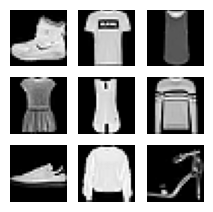

In [39]:
plt.figure(figsize=(2.5, 2.5))
for i in range(len(labels)-1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i, :, :], cmap='gray')
    plt.autoscale(axis="both", tight=True, enable=True)
    plt.axis("off")

*Step 2. Normalize data*<br/>
pixel values between 0 and 255; Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [40]:
x_train, x_test = x_train/255.0, x_test/255.0    

*Step 3. Creating a Sequential model*<br/>
[Sequential model](https://keras.io/guides/sequential_model/)<br/>
[Dense layer](https://keras.io/api/layers/core_layers/dense/)<br/>
[Activation functions](https://keras.io/api/layers/activations/)<br/>
[Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/)<br/>

In [41]:
# Define Sequential model with 3 layers using 2 methods
def building_model(x_train,units_layer1, units_layer2, units_output, fun_output, method):
    global model
    if method==1:
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape=x_train.shape[1:3]))         # Layer input : Input must be vectored; x_train.shape[1:3]:(28, 28)
        model.add(keras.layers.Dense(units_layer1, activation="relu"))          # Layer 1: The first hidden layer
        model.add(keras.layers.Dense(units_layer2, activation="relu"))          # Layer 2: The second hidden layer
        model.add(keras.layers.Dense(units_output, activation=fun_output))      # Layer output or 3: 10 neuron = 10 class; Multi classification then activation is softmax
    elif method==2:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
            keras.layers.Dense(units_layer1,activation="relu"),
            keras.layers.Dense(units_layer2, activation="relu"),
            keras.layers.Dense(units_output, activation=fun_output)])
    return model
model= building_model(x_train,units_layer1=100, units_layer2=75, units_output=10, fun_output="softmax", method=2)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 100)               78500     
                                                                 
 dense_47 (Dense)            (None, 75)                7575      
                                                                 
 dense_48 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Step 3.1: Print the model parameters*

In [42]:
model.layers

In [43]:
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"weights:{weights}; weights.shape: {weights.shape}")
print(f" bias: {bias}; bias.shape: {bias.shape}")

weights:[[-0.02383609  0.03351085 -0.05519742 ...  0.04604888 -0.0197298
  -0.08124409]
 [-0.07210767 -0.07808407  0.04149415 ... -0.04262806  0.06230271
   0.06148922]
 [ 0.05307278  0.00803353 -0.05707329 ... -0.08126932 -0.03887204
  -0.02396051]
 ...
 [-0.02994338  0.00211837  0.08155316 ...  0.00128915  0.03911582
  -0.07306636]
 [ 0.01261988 -0.00767657 -0.05250114 ... -0.0616102  -0.019924
  -0.0224393 ]
 [-0.07530802  0.05126864 -0.05741581 ...  0.04985867  0.07186888
   0.0020948 ]]; weights.shape: (784, 100)
 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; bias.shape: (100,)


*Step 4. [Compile Model](https://keras.io/api/models/model_training_apis/)*<br/>
[Metrics](https://keras.io/api/metrics/)<br/>

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Multi Classification:sparse_categorical_crossentropy

*Step 5: [Fit method](https://keras.io/api/models/model_training_apis/)*<br/>

In [45]:
history_train = model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 11s 6ms/step - loss: 0.8235 - accuracy: 0.7278 - val_loss: 0.5585 - val_accuracy: 0.8083
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5141 - accuracy: 0.8227 - val_loss: 0.5103 - val_accuracy: 0.8204
Epoch 3/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4613 - accuracy: 0.8393 - val_loss: 0.4563 - val_accuracy: 0.8410
Epoch 4/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4337 - accuracy: 0.8484 - val_loss: 0.4280 - val_accuracy: 0.8500
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.8556 - val_loss: 0.4176 - val_accuracy: 0.8530
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8601 - val_loss: 0.4072 - val_accuracy: 0.8571
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3847 - accuracy: 0.8643 - val_loss: 0.4099 - val_accuracy

*Step 5.1: Print the history parameters*

In [46]:
print(f" history_params: {history_train.params}")
print(f"Loss_train: {history_train.history['loss']}")                              # print(f"history.history: {history.history}")
print(f"Accuracy_train: {history_train.history['accuracy']}")
print(f"Loss_validation: {history_train.history['val_loss']}")
print(f"Accuracy_validation: {history_train.history['val_accuracy']}")

 history_params: {'verbose': 1, 'epochs': 20, 'steps': 1594}
Loss_train: [0.8235107064247131, 0.5141225457191467, 0.46129682660102844, 0.43370094895362854, 0.4129970073699951, 0.3973400592803955, 0.3847287595272064, 0.37225788831710815, 0.36264222860336304, 0.3538484275341034, 0.34630087018013, 0.33771610260009766, 0.3310639262199402, 0.32438579201698303, 0.3180685043334961, 0.31273114681243896, 0.3062456250190735, 0.3012879192829132, 0.29628658294677734, 0.2920190393924713]
Accuracy_train: [0.7277843356132507, 0.8226862549781799, 0.839274525642395, 0.8483725786209106, 0.8555686473846436, 0.8600784540176392, 0.864254891872406, 0.8683921694755554, 0.8719019889831543, 0.8740392327308655, 0.8762549161911011, 0.8781960606575012, 0.882019579410553, 0.8833529353141785, 0.8857647180557251, 0.8871960639953613, 0.8894901871681213, 0.8915489912033081, 0.894019603729248, 0.8950784206390381]
Loss_validation: [0.558455228805542, 0.5102646946907043, 0.4563395082950592, 0.4280143678188324, 0.41758048

*Step 5.2: Plot*

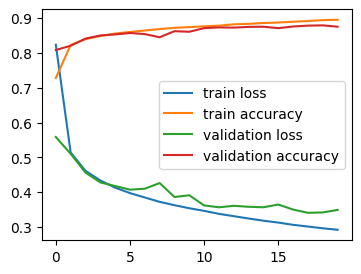

In [48]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(history_train.history["loss"], label="train loss")
ax.plot(history_train.history["accuracy"], label="train accuracy")
ax.plot(history_train.history["val_loss"], label="validation loss")
ax.plot(history_train.history["val_accuracy"], label="validation accuracy")
ax.legend()

*Step 6: [Evaluate Model](https://keras.io/api/models/model_training_apis/)*


In [50]:
history_test = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8679


Step 7: Predict Model

In [51]:
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"pred.shape: {pred.shape}")
print(f"pred_x_test: {pred_x_test}")
print(f"labels_pred: {labels_pred}, y_test: {y_test[0:4]}")


1/1 [==============================] - 0s 209ms/step
pred.shape: (4, 28, 28)
pred_x_test: [[0.    0.    0.    0.    0.    0.021 0.    0.049 0.002 0.927]
 [0.    0.    0.999 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
labels_pred: [9 2 1 1], y_test: [9 2 1 1]


**Vanishing/exploding gradients**
- Initialization
  - [Article](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
- Nonsaturating activation functions
- Batch normalization
- Gradient clipping

**Time**

**Limited data**

**Overfitting**
- `L1 and L2 regularization` 
  - `kernel_regularizer:` Regularizer to apply a penalty on the layer's kernel
  - `bias_regularizer:` Regularizer to apply a penalty on the layer's bias
  - `activity_regularizer:` Regularizer to apply a penalty on the layer's output
  - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)
  - [link 2](https://keras.io/api/layers/regularizers/)
- `Dropout` 
   - [Article 1](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
   - [Article 2](https://proceedings.mlr.press/v48/gal16.pdf)
   - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
   - [AlphaDropout:](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AlphaDropout) It fits well to Scaled Exponential Linear Units by randomly setting activations to the negative saturation value.
- `Max-Norm`

In [ ]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100,
                                                   # kernel_regularizer=keras.regularizers.l2(0.01),   # L2 Regularization Penalty
                                                   kernel_regularizer=keras.regularizers.L1L2(l1=0.01, l2=0.01),  # L1 + L2 penalties
                                                   activation="relu"),
                                # keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=75, 
                                                   # kernel_regularizer=keras.regularizers.l2(0.01),
                                                   activation="relu"),
                                keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axs[0].plot(history_train.history["loss"], label="train loss")
axs[0].plot(history_train.history["accuracy"], label="train accuracy")
axs[1].plot(history_train.history["val_loss"], label="validation loss")
axs[1].plot(history_train.history["val_accuracy"], label="validation accuracy")
axs[0].legend()
axs[1].legend()

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),                       
    keras.layers.Dense(10, activation="softmax")
])